# Importing Libraries and Defining functions

### Libraries

Importing all relevant librarier and marking their ultilized versions for reproducability

In [1]:
import numpy as np #1.25.2
import pandas as pd #2.0.3
from bs4 import BeautifulSoup #4.12.3
import requests #2.31.0
from collections import Counter
import string
import spacy #3.7.4
from spacy import displacy #3.7.4
import nltk #3.8.1
from nltk.stem import WordNetLemmatizer, PorterStemmer #3.8.1
from nltk.stem.snowball import SnowballStemmer #3.8.1
from nltk.tokenize import sent_tokenize #3.8.1
nltk.download('punkt')
import gensim.downloader as api #4.3.2
from transformers import pipeline #4.38.2
from wordcloud import WordCloud #1.9.3
import matplotlib.pyplot as plt #3.7.1
import networkx as nx #3.3
from sklearn.feature_extraction.text import TfidfVectorizer #2.2.0
from textblob import TextBlob #0.17.1
!pip install pyLDAvis
import pyLDAvis #3.4.1
import pyLDAvis.gensim #3.4.1
from gensim.models.ldamodel import LdaModel #4.3.2
from gensim.models import CoherenceModel #4.3.2
from gensim import corpora, models #4.3.2
import chardet #5.2.0
import requests #2.31.0
!pip install praw
import praw #7.7.1
!pip install deep_translator
from deep_translator import GoogleTranslator #1.11.4
import pickle #3.0.3
!pip install bertopic
from bertopic import BERTopic #0.16.0
from sklearn.feature_extraction.text import CountVectorizer #2.2.0
from bertopic.vectorizers import ClassTfidfTransformer #0.16.0
from bertopic.representation import KeyBERTInspired #0.16.0

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [69]:
pip freeze

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



absl-py==1.4.0
aiohttp==3.9.3
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.12.3
bertopic==0.16.0
bidict==0.23.1
bigframes==1.0.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.1
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.2
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.1
cryptography==42.0.5
cufflinks==0.17.3
cup

### Tokenization, Lemmatization, Vectorization etc.

Load a NLP model for English from spacy and intitiliaize several tools

In [2]:
#getting a model with various NLP tools such as tokenizers, lemmatizers, etc.
nlp = spacy.load("en_core_web_sm")

stop_words = nlp.Defaults.stop_words # Access the default set of stop words provided by spaCy for English
punctuations = string.punctuation # Access the set of punctuation characters from the string module
lemmatizer = WordNetLemmatizer() # Initialize the WordNet lemmatizer from NLTK
ps = PorterStemmer() # Initialize the Porter Stemmer from NLTK
snowBallStemmer = SnowballStemmer("english") # Initialize the Snowball Stemmer for English from NLTK

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Define a function to tokenize, lemmatize, filter stopwords/punctuations, and check if the letters are alphabetical

In [3]:
# Tokenize, lemmatize, filter stopwords/punctuations, and check if alphabetical in function
def tokenizer(sentence):

  if not sentence:  # Check if sentence is empty or None
      return []

  else:
    tokens = [
        snowBallStemmer.stem(word.lemma_.lower().strip()) #reduce words to their base form
        for word in nlp(sentence)  #convert to tokens
        if word.lemma_.lower().strip() not in stop_words #strip stopwords
        and word.lemma_.lower().strip() not in punctuations #strip punctuation
        and word.lemma_.isalpha() # alphabetic character check
    ]

    return tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Load the pretrained GloVe word embedding model

In [4]:
wv = api.load('glove-twitter-50') #GloVe vectorizes the tokens of word co-occurrences throughout the text corpus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Define a function to retreive the vector of an input sentence using the GloVe model

In [5]:
#Evaluate the average vector for a sentence.
def sent_vec(sent, wv):

  if not sent:  # Check if sentence is empty or None
      return []

  else:
    word_vectors = np.array([wv[w] for w in sent if w in wv]) # Extract the vectors for words found in the model's vocabulary

    if len(word_vectors) == 0:
        return np.zeros(wv.vector_size) # If no words in the sentence are found in the model, return a zero vector

    avg_vector = np.mean(word_vectors, axis=0) # Compute the average vector across all extracted word vectors

    return avg_vector

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Web Scraping Functions

Define a function for translating a single sentence using google translator

In [6]:
def translator(sentence):
    translated_sentence = GoogleTranslator(source='it', target='en').translate(text=sentence)
    return translated_sentence

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Define a function for translating a batch of sentences using google translator

In [7]:
def translator_batch(sentence_list):
    translated_list = GoogleTranslator(source='it', target='en').translate_batch(sentence_list)
    return translated_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A function to that takes the content of a text, split it in sentences, tokenizes (etc.) them and stores each sentence in the row of a data frame,

In [8]:
#function fo extracting article text as sentences in rows of a data frame from the html code
def extract_article_data(content):

  df = pd.DataFrame(columns=["sentences"]) #initialize an empty data frame to store the setnences in the article
  sentences_list = []  # List to store extracted sentences

  for section in content: #iterate through different sections of the content

    body_paragraphs = section.find_all("p") # Find all body elements based on tag "p"
    if not body_paragraphs: continue # Handle cases where no elements are found

    for paragraph in body_paragraphs:

      paragraph_text = paragraph.get_text(separator="\n", strip=True) # handle paragraphs
      sentences = sent_tokenize(paragraph_text) # Split the paragraphs into sentences using NLTK's sentence tokenizer
      sentences_list.extend(sentences)  # Add non-Italian sentences

  df = pd.DataFrame(sentences_list, columns=["sentences"])#get the sentences into a dataframe

  return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A function to perform the same process as the previous but specifically build for reuters articles, which required seperate and different handling outside the Colab enviroment.

In [9]:
# function for extracting article text (Reuters specifically) as sentences in rows of a dataframe from html code
def extract_reuters_article_data(content, soup):
    df = pd.DataFrame(columns=['sentences']) # initializes empty dataframe to store sentences in the article
    sentences_list = [] # list to store extracted sentences

    for section in content: # iterate through different sections of content
        body_paragraphs = section.find_all('p')
        if not body_paragraphs:
            paragraph_id = section.get('data-testid') # reuters: no tag 'p', instead 'data-testid'
            body_paragraphs = soup.find('div', attrs={'data-testid': paragraph_id}) # find body paragraphs labelled 'paragraph- '

        paragraph_text = body_paragraphs.get_text(separator='\n', strip=True) # handle paragraphs
        sentences = sent_tokenize(paragraph_text) # split paragraphs into sentences using NLTK's sentence tokenizer
        sentences_list.extend(sentences) # store in list

    df = pd.DataFrame(sentences_list, columns=['sentences']) # get sentences into dataframe

    return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A scrapping function that uses beauiful soup and the url and class as input to scarpe the html content from the webiste of a news outlet, returning the text (after applying the prior extraction function) in a data frame

In [10]:
#final scraping fuction that takes url and main body dividing class of an article
#as input and scrapes the article, transforms it into a dataframe of sentences
#and tokenizes, lemmatizes, filters stopwords/punctuations, checks if alphabetical
#and vecotorizes

def scrape(url, clss, lan = "EN"): #takes a url and class as input

  response = requests.get(url) #request and get the HTML content
  html_content = response.content

  soup = BeautifulSoup(html_content, "html.parser") #parse the HTML content

  content = soup.find_all("div", class_= clss) #get the content of the main text
  data = extract_article_data(content) #extract the sentences into a data frame

  if lan == "IT":
    data["sentences"] = data["sentences"].apply(lambda sentence: translator(sentence)) #tanslate sentences into english if indicated that they are in italian

  data["tokens"] = data["sentences"].apply(lambda sentence: tokenizer(sentence)) #apply the tokenizer function
  data['joined tokens'] = data['tokens'].apply(lambda x: ' '.join(x)) #join the tokenized sentences back together for analysis
  data['vector'] = data['sentences'].apply(lambda x: sent_vec(x, wv)) #apply vectorization

  return data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A seperate dynamic scraing function for reuters articles

In [11]:
# using selenium to obtain html content
def scrape_dynamic(url, clss):

    driver = webdriver.Firefox() # start web browser: Chrome (or use Firefox, )
    driver.get(url) # request url
    html_content = driver.page_source # get html content
    driver.close() # close web browser

    soup = BeautifulSoup(html_content, 'html.parser') # parse html content
    content = soup.find_all('div', class_=clss) # get content of main text
    data = extract_reuters_article_data(content, soup) # extract sentences into dataframe

    data['tokens'] = data['sentences'].apply(lambda sentences: tokenizer(sentences)) # apply tokenizer function
    data['vector'] = data['sentences'].apply(lambda x: sent_vec(x, wv)) # apply vectorization

    return data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Reddit Scraping Functions

Define client id etc. to access the reddit scrapping API

In [12]:
# create instance of reddit class (read-only)
# client_id, client_secret, and user_agent are associated with the test app from claire's account
reddit = praw.Reddit(client_id = 'OuQ4O6csiU6qPjs3icSLLw',
                    client_secret = 'waYHFVjeqtafXuFupji5150fceJs3A',
                    user_agent = 'test by u/clairexxxooo')

# return None: read-only mode
print(reddit.user.me())

None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/praw/util/deprecate_args.py:43: DeprecationWarning: The 'None' return value is deprecated, and will raise a ReadOnlyException beginning with PRAW 8. See documentation for forward compatibility options.
  return func(**dict(zip(_old_args, args)), **kwargs)


Scrape reddit data from posts using their URLs and the reddit API and apply the same tokenization (etc.)

In [13]:
def scrape_reddit(url):
  submission = reddit.submission(url=url) # submission object

  data = pd.DataFrame(columns=['comments'])
  comments = [] # list of all comments in italian

  comments.append(submission.selftext) # body of post

  for top_comments in submission.comments: # first layer comment
      comments.append(top_comments.body)
      for second_comments in top_comments.replies: # second layer comment
          comments.append(second_comments.body)
          for third_comments in second_comments.replies: # third layer comment
              comments.append(third_comments.body)

  comments = translator_batch(comments) # translate

  comments = [comment for comment in comments if comment] # remove empty comments

  data = pd.DataFrame(comments, columns=['comments']) # put comments in data frame
  data['tokens'] = data['comments'].apply(lambda sentences: tokenizer(sentences)) # tokenize comments
  data['joined tokens'] = data['tokens'].apply(lambda x: ' '.join(x)) #join the tokenized comments back together for analysis
  data['vector'] = data['comments'].apply(lambda x: sent_vec(x, wv)) # vectorize

  return data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### NLP Task Functions

A function to extract the 5 most common keywords found in each text data frame passed ot the function in a dictionary using the TFIDF vectorizer

In [14]:
# function for keyword extraction

def keyword_extract(article_dict):

  keywords = {}  # a dictionary to hold teh urls and corresponding top 5 features

  for url, data in article_dict.items():

    vectorizer = TfidfVectorizer(max_features=5)  # Extract top 5 keywords
    data['document'] = data['tokens'].apply(lambda x: ' '.join(x)) #take the tokenized list and join it back into a document

    # Check for empty document
    if not data['document'].empty:

      X = vectorizer.fit_transform(data['document'])  #Fits the TF-IDF vectorizer to learn the importance of the words
      feature_names = vectorizer.get_feature_names_out()  # Get the vocabulary
      top_keywords = feature_names[X.sum(axis=0).argsort()[-5:]]  #Sums the TF-IDF scores across all documents, sorts the summed scores in descending order and retrieves the last 5 (most important)
      keywords[url] = top_keywords  # Add keywords to the dictionary

    else:
      print(f"Warning: Document for URL '{url}' is empty. Skipping keyword extraction.")
      continue

  return keywords  # Return the keywords dictionary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A function to get a summary count of the 10 most common keywords across all texts passed.

In [15]:
#take articles in a dictionary and return the most frequent keywords
def frequent_keywords (article_dict):

  world_keywords = keyword_extract(article_dict) #extract the keywords for each article using the prior function

  all_keywords = [] #start a list to store all keywords
  for url, keywords in world_keywords.items(): #add keywords to the list
    for keywords in keywords:
      all_keywords.extend(keywords)

  keyword_counts = Counter(all_keywords) #apply a counter to count the frequency of the keywords in the list

  top_keywords = keyword_counts.most_common(10) #extract the 10 most common keywords

  #print the keywords
  print("Top Keywords:")
  for keyword, count in top_keywords:
    print(f"Keyword: {keyword} ; Count: {count}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A function to create a wordcloud from the dictionary of texts passed to the function.

In [16]:
# function for creating a wordcloud
def wordcloud(article_dict):

    all_articles_text = "" #initialize an empty string for the text of all the articles

    for url, article_df in article_dict.items(): #loop through the data frames

      for sentence_tokens in article_df['tokens'].tolist(): #loop through the word tokens colun

        joined_sentence = " ".join(sentence_tokens) # Join the word tokens within each sentence into a string
        all_articles_text += joined_sentence + " "  # Concatenate the joined sentence to the all_articles_text string

    wordcloud = WordCloud(background_color="white", width=800, height=600).generate(all_articles_text) # Create the word cloud object

    # Create a figure and display the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Chiara Ferragni Scandal Word Cloud")
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Define a function to perform a simple sentiment analysis using TextBlob, classifying sentences and articles into Positive, Negative and Neutral based on a calculated score

In [17]:
# simple sentiment analysis
def simple_sentiment (article_dict):

  average_sentiment_dict = {} #dictionary for holding the average sentiment per article
  sentiment_dict ={} #dicitonary fpor holding the individual sentence sentiments per article

  for url, data in article_dict.items(): #iterate all articles dataframes

    sentiment_scores_list = [] #list for holding the sentiment scores of the sentences

    for sentence in data['joined tokens']: #iterate the joined sentences of each dataframe
      sentiment_scores_list.append(TextBlob(sentence).sentiment)  # Analyze sentiment for each sentence and append it to the list of scores

    data['sentiment'] = sentiment_scores_list # Add sentiment scores as a new column to the DataFram

    sentiment_classes = [] #a list to hold the sentiment classes neutral, positive and negative
    for score in sentiment_scores_list: #if statement to assign a class based on the sentiment score of each sentence
      if score.polarity < -0.2: sentiment_classes.append("Negative")
      elif score.polarity > 0.2: sentiment_classes.append("Positive")
      else: sentiment_classes.append("Neutral")

    data['simple sentiment'] = sentiment_classes  # Add sentiment class labels

    sentiment_dict[url] = data #add the data frame to the dictionary

    if len(sentiment_scores_list) > 0: #avoid divison by zero
      average_polarity = sum(score.polarity for score in sentiment_scores_list) / len(sentiment_scores_list) # Calculate summary sentiment
    else:
      continue

    if average_polarity < -0.2: average_sentiment_dict[url] = "Negative" #add a class assigned based on average polarity of the articles into a doctionary with the url of the article as the key
    elif average_polarity > 0.2: average_sentiment_dict[url] = "Positive"
    else: average_sentiment_dict[url] = "Neutral"

  return sentiment_dict, average_sentiment_dict #return both dictionaries

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Utilize a the pretrained RoBERTa model trained on twitter data to provide a more powerful sentiment analysis into Positive, Negative and Neutral

In [18]:
#more complex sentiment analysis
simple_classifier = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest", top_k=None)

def normal_sentiment(article_dict):

  sentiment_dict ={} #dicitonary fpor holding the individual sentence sentiments per article

  for url, article in article_dict.items(): #iterate all articles dataframes

    sentiment_scores_list = [] #list for holding the sentiment scores of the sentences

    for sentence in article['joined tokens']: #iterate the joined sentences of each dataframe
      sentiment = simple_classifier(sentence)
      sentiment_scores_list.append(sentiment[0][0])  # Analyze sentiment for each sentence and append the highest scored to the list of scores

    article['sentiment'] = sentiment_scores_list # Add sentiment scores as a new column to the DataFram
    sentiment_dict[url] = article #add the data frame to the dictionary

  return sentiment_dict  #return dictionary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

Utilize a the pretrained RoBERTa base go emotions model from hugging face defined a function for a more complex sentiment analysis able to distinguish 28 different more subtle emotions.

In [19]:
#more complex sentiment analysis
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

def comp_sentiment (article_dict):

  sentiment_dict ={} #dicitonary fpor holding the individual sentence sentiments per article

  for url, article in article_dict.items(): #iterate all articles dataframes

    sentiment_scores_list = [] #list for holding the sentiment scores of the sentences

    for sentence in article['joined tokens']: #iterate the joined sentences of each dataframe
      sentiment = classifier(sentence)
      sentiment_scores_list.append(sentiment[0][0])  # Analyze sentiment for each sentence and append the highest scored to the list of scores

    article['complex sentiment'] = sentiment_scores_list # Add sentiment scores as a new column to the DataFram
    sentiment_dict[url] = article #add the data frame to the dictionary

  return sentiment_dict  #return dictionary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A function to extract the most frequent emotions extracted by the two  sentiment anlysis models (the choice of which is inidcated by a model parameter)

In [20]:
# apply complex sentiment analysis and retreive the most frequent sentimenta by count
def frequent_sentiments(article_dict, model_type = "simple"):

  if model_type == "complex": # check if the parameter asks for the application of a complex model, else use a simple one
    sentiment_dict = comp_sentiment(article_dict) # get the compelx sentiment for each sentence
  else:
    sentiment_dict = normal_sentiment(article_dict)

  sentiment_counts = Counter() #initialize a counter

  for url, article in sentiment_dict.items():

    if 'complex sentiment' in article:
      sentiments = article['complex sentiment']  # Extract sentiment scores from the 'complex sentiment' column

    elif 'sentiment' in article:
      sentiments = article['sentiment'] #Same extraction in case the normal sentiment analysis was employed

    else: sentiments = {}

    for sentiment in sentiments: # Iterate over the list of sentiments in each article
      sentiment_label = sentiment['label'] # Extract the sentiment label
      sentiment_counts.update([sentiment_label]) # Update counter with the sentiment label

  # Get the most frequent sentiments (top 3 by default)
  most_frequent = sentiment_counts.most_common(5)

  # Print the most frequent sentiments and their counts
  print("Most Frequent Sentiments:")
  for sentiment, count in most_frequent:
    print(f"- {sentiment}: {count} occurrences")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Define a topic modeling function that uses word2vec to build a LDA model to uncover hidden thematic structures within a collection of documents and visualize the discovered topics nicely using the pyLDAvis notebook.

In [21]:
# topic modeling
def topic_model(article_dict): # get the topic of each region's articles

    tokens_list = []  # store tokens of each article in one list
    for url, article in article_dict.items():
        tokens_list.extend(article['tokens'])

    dictionary = corpora.Dictionary(tokens_list) # make a dictionary
    corpus = [dictionary.doc2bow(text) for text in tokens_list] # make a corpus

    lda = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15) # define modl parameters
    topics = lda.print_topics() # topics list
    for topic in topics: # print topics
        print(topic)

    # interactive visualization of LDA model
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary) #pass the model, corpus and doctionary as parameters

    return vis #return the visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A function to use a pretrained BERTopic model for topic modeling which allows for better topic clustering and visualization varity

In [64]:
# Bert Topic Modelling with CountVectorizer - "preprocesses sentences" (remove stop words) after BERT document embedding and clustering
def bert_cv(scraped_data_dict):
    sentence_list = []  # store sentences of each article in one list
    for url, article in scraped_data_dict.items():
        sentence_list.extend(article['sentences'])
    sentence_list = [item for item in sentence_list if item is not None] # filter out empty sentences

    vectorizer_model = CountVectorizer(stop_words='english')  # initialize CountVectorizer
    model = BERTopic(vectorizer_model=vectorizer_model, min_topic_size=15) # initialize model with CountVectorizer
    topic, probabilities = model.fit_transform(sentence_list)   # train model with sentence list

    return model, sentence_list # return fitted model and sentence list, sentence list needed for visualization of clustering sentences

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Define a function for printing the entities for each sentence that are in a list of defined important entity types

In [23]:
# Entity recongnition function that prints the entities for each sentence
def NER(article_dict):
    desired_tags = ["GPE", "LOC", "PERSON", "ORG", "NORP"] # define desired entity tags, just chose "geopolitical entity" (GPE), location (LOC), people (PERSON), organization (ORG), and nationality, religion or political group (NORP)

    for url, article in article_dict.items():

          for sentence in article['sentences']:
            doc = nlp(sentence)  # Process the sentence with spaCy

            spacy.displacy.render(doc, style='ent') # optional: print each sentence with the entities highlighted (cannot specify to only highlight those from the specified tag list)

            print("Entities in sentence:") # print entities in sentence if they are one of the desired tags

            for entity in doc.ents:
              if entity.label_ in desired_tags:
                print(entity.text, entity.label_)
            print("-"*20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A function to get a display the most frequent entites appearing in the text grouped by their belonging to imortant entity types

In [24]:
# Getting the most frequent entities from the articles
def NER2(article_dict):
  # Define desired entity tags
  desired_tags = ["PERSON", "ORG", "GPE", "LOC", "PRODUCT", "EVENT", "FACILITY", "LAW"]

  # Create a temporary dictionary to store entity findings
  entity_dict = {tag: [] for tag in desired_tags}  # Initialize with empty lists

  for url, article in article_dict.items():

    # Process all sentences in the article
    for sentence in article['sentences']:

      # Process the sentence with spaCy
      if sentence:
        doc = nlp(sentence)

        # Find entities and update the list in the dictionary
        for entity in doc.ents:
          if entity.label_ in desired_tags:
            entity_dict[entity.label_].append(entity.text)

  print("Top Entities")
  for label, ent_list in entity_dict.items():
    entity_count = Counter(ent_list) #apply a counter to count the frequency of the entities in the list
    top_entities = entity_count.most_common(5) #extract the 5 most common keywords

    print(f"Type {label}")
    for entity_name, count in top_entities:
      print(f"Entity: {entity_name} ; Count: {count}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A function to extract important relationships between important entites and add them as edges to a network graph which is printed as output in the end

In [25]:
def relationships(article_dict):

  G = nx.Graph() #initilaize a network graph

  for url, article in article_dict.items(): # Iterate through each article (URL, DataFrame) in the dictionary

    # Iterate through each sentence in the article
    for sentence in article["sentences"]:

      if sentence:
        rel = nlp(sentence) #apply spacy model to each sentence in the data frame
        sentence_relationships = []

        important_entity = ["PERSON", "ORG", "GPE", "LOC", "PRODUCT", "EVENT",
                            "NORP", "FACILITY", "LAW", "DOC", "FOOD", "MATERIAL", "MEASURE",
                            ]

        important_dependency = ["subj", "obj", "poss", "xcomp", "dobj", "nsubj",
                                "nsubjpass", "csubj", "csubjpass", "agent", "patient",
                                "aux"]
        important_dependency = ["subj", "obj", "poss", "xcomp", "dobj","nsubj",
                                "nsubjpass", "csubj", "csubjpass", "agent", "patient",
                                "aux", "amod", "nmod", "advmod", "appos"]

        # Identify named entities and their relationships based on dependency parsing
        for token in rel: #iterates over each individual token (word) in the processed sentence
          if token.ent_type_ in important_entity: #checks if the current token (word) is a named entity found in the list of important entities

            for child in token.subtree:  # Search the subtree
              if child.ent_type and child.text != token.text and child.dep_ in important_dependency: #check if there is a child and if its it has an important dependency and its not the same as a token

                for entity in nlp(child.text):  # Iterate through entities in the child text to check if they are also important enitites
                  if entity.ent_type_ in important_entity:  # Filter by entity type

                     G.add_edge(token.text, entity.text)  # Add edge to the network graph

  # Create a new graph with only large components
  large_components = [G.subgraph(component) for component in list(nx.connected_components(G)) if len(component) >=3]
  combined_graph = nx.union_all(large_components)

  # Create a spring layout for the realtionships and display it
  plt.figure(figsize=(10, 8))  # Set figure size
  nx.draw(combined_graph, with_labels=True, node_color='lightblue', edge_color='black')  # Draw the graph with labels and styling
  plt.title(f"Entity Relationships")
  plt.show()  # Display the plot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Define a function to summarize the article text by using the top N highest scoring sentences in a text (with closest vector similarity to the entire document vector) to summarize the text.

In [26]:
# Text summarization using similarity scores and selection of the GloVe vector word embedding

def summarize_article(article_dict, summary_length=5):

  #Loop through the dictionary for my
  for url, article in article_dict.items():

    scores = [] # Create an empty list to store sentence scores for the current article

    if not article["vector"].items():  # Check if the vector list is empty and continue if true to avoid errors
      continue

    document_vector = np.mean(article["vector"], axis=0) # Calculate the document vector

    # Loop through each sentence vector in the article
    for sentence_vector in article["vector"]:
      similarity_score = np.dot(document_vector, sentence_vector) / (np.linalg.norm(document_vector) * np.linalg.norm(sentence_vector)) # Calculate cosine similarity score between the document vector and the current sentence vector
      scores.append(similarity_score) # Append the calculated similarity score to the scores list

    article['score'] = scores # Add the 'score' column to the article DataFrame, containing the calculated similarity scores for each sentence

    summary_sentences = article.sort_values(by='score', ascending=False).head(summary_length) # Sort the article DataFrame by the 'score' column in descending order and select top sentences by score
    summary_text = '\n'.join(summary_sentences['sentences'].tolist())

    print(url)
    print(summary_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# News Article Implementation

### Scrape Articles

Scrape the articles seperated into dictinaries by regions of interest

In [115]:
# EU articles: 16
EU_articles = {"https://www.bbc.co.uk/news/world-europe-67759633" : "ssrcss-7uxr49-RichTextContainer e5tfeyi1", #bbc
            "https://www.telegraph.co.uk/world-news/2023/12/19/italy-influencer-chiara-ferragni-fined-christmas-cake-sale/":"articleBodyText section", #telegraph
            "https://www.theguardian.com/world/2024/jan/13/chiara-ferragni-italy-influencers-charity-christmas-cake-scandal":"dcr-ch7w1w", #theguardian
            "https://www.independent.co.uk/life-style/chiara-ferragni-pandoro-charity-fined-b2467495.html" : "sc-1fcmxs3-1 sc-1i4xxi7-1 gypkPg jdNiRn", #independent
            "https://www.independent.co.uk/news/world/europe/chiara-ferragni-ap-italian-rome-italy-b2475218.html" : "sc-jbiisr-0 dJaXMd sc-jbiisr-2 dbwULn", #independent
            "https://www.independent.co.uk/news/world/europe/italian-ap-chiara-ferragni-cabinet-rome-b2485042.html" :"sc-jbiisr-0 dJaXMd sc-jbiisr-2 dbwULn", #independent
            "https://www.hellomagazine.com/hfm/culture/510008/chiara-ferragni-pandoro-panettone-scandal/" : "articleBody_a12v6gcb HFMBodyContent_hs8dd92", #hellomagazine
            "https://www.euronews.com/business/2023/12/22/chiara-ferragni-how-influential-are-influencers-on-consumer-decisions": "c-article-content c-article-content--business js-article-content", #euronews
            "https://www.swissinfo.ch/eng/italy-s-meloni-takes-aim-at-influencer-ferragni-over-misleading-claims/49066542" : "content-container", #swissinfo
            "https://www.swissinfo.ch/eng/italy-regulator-tightens-rules-on-influencers-after-ferragni-scandal/71249603" : "content-container", #swissinfo
            "https://www.swissinfo.ch/eng/italy-tightens-charity-giving-rules-after-influencer-ferragni-scandal/71867382" : "content-container", #swissinfo
            'https://tiranapost.al/english/stil-jete/chiara-ferragni-kerkon-falje-do-i-dhuroj-spitalit-nje-milion-euro-i529927': 'c-open-content', #tiranapost (albania)
            'https://www.just-food.com/news/italys-balocco-under-antitrust-probe-over-misleading-marketing-campaign/': 'cell large-8 main-content', #just-food (uk)
            'https://english.elpais.com/people/2024-02-12/the-storm-around-chiara-ferragni-is-not-letting-up.html': 'a_c clearfix', # el pais
            'https://english.elpais.com/people/2023-12-27/chiara-ferragnis-empire-is-on-thin-ice-due-to-a-fake-charity-campaign.html#': 'a_c clearfix', # el pais
            'https://efa-net.eu/news/italian-influencer-fundraising-scandal-must-lead-to-better-standards-says-assif': 'the_content_wrapper', # european fundraising association, netherlands
            }
EU_scraped_data = {} #dictionary for storing different datasets  with urls associated as keys

for url, clss in EU_articles.items(): #iterate through the articles
  data = scrape(url, clss) #scrape the articles one after another
  EU_scraped_data[url] = data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
# Italian articles in english: 15
IT_articles_en = {'https://www.ilmessaggero.it/en/chiara_ferragni_and_the_ferragni_balocco_case_jurisdiction_decision-7902021.html': 'body-text', # il messaggero
                   'https://milano.corriere.it/notizie/cronaca/24_febbraio_24/chiara-ferragni-i-am-far-from-perfect-but-i-ve-always-been-in-good-faith-fedez-it-s-right-to-keep-our-problems-to-ourselves-64ed411d-0605-4b97-9382-fc11ee5a2xlk.shtml': 'content', # corriere milano
                   'https://www.unionesarda.it/en/the-balocco-ferragni-pandoro-and-the-quot-incorrect-charity-practicesquot-the-accusation-by-the-antitrust-bzabcl5h': 'article-body article-share', #unione sarda
                   'https://www.unionesarda.it/en/italy/chiara-ferragni-and-balocco-huge-fine-from-the-antitrust-14-million-fine-for-the-designer-pandoro-rft9jc2z': 'article-body article-share', #unione sarda
                   'https://www.wantedinrome.com/news/italy-chiara-ferragni-influencer-pandoro.html': 'tdb-block-inner td-fix-index', # wanted in rome
                   'https://www.ansa.it/english/news/business/2023/12/18/ferragni-to-donate-1-mn-to-hospital-amid-pandoro-furore_410f0b3e-f074-4bf0-ac55-782c9965bde4.html': 'article-main', # ansa
                   'https://www.ansa.it/english/news/general_news/2023/12/21/finance-cops-to-get-antitrust-docs-in-ferragni-pandoro-case_1395ffa2-f2ea-4caf-900a-c0e845cffea9.html': 'article-main', #ansa
                   'https://www.ansa.it/english/news/business/2023/12/19/ferragni-in-new-storm-over-easter-egg-after-pandoro-row_0454608b-5700-4fef-b477-3e9b659a9d40.html': 'article-main', # ansa
                   'https://www.ansa.it/english/news/2023/12/15/ferragni-to-challenge-unjust-antitrust-decision-on-pandoro_d7cc3207-b3b5-46fa-8ae6-15684c74d744.html': 'article-main', # ansa
                   'https://www.ansa.it/english/news/lifestyle/arts/2024/02/14/ferragni-appeals-against-antitrust-fine_cf3b098f-9b3a-490d-b846-fb0c5897789a.html': 'article-main', # ansa
                   'https://www.ansa.it/english/news/2024/01/08/ferragni-balocco-case-could-become-fraud-probe_17cd4768-32bc-4846-9995-82eb0de8e846.html': 'article-main', # ansa
                   'https://www.ansa.it/english/news/2024/01/05/coca-cola-says-for-now-ferragni-content-will-not-be-used_820a76dc-4a56-4989-b820-20d7e93a9614.html': 'article-main', # ansa
                   'https://www.ansa.it/english/news/business/2023/12/15/antitrust-fines-ferragni-and-balocco-over-pandoro-sales_fbb9189f-bee2-49cd-82d1-704cb7a0a0e0.html': 'article-main', # ansa
                   'https://www.aboutresilience.com/what-i-honestly-think-about-you/': 'td-ss-main-content', # about resilience
                   'https://www.firstonline.info/en/chiara-ferragni-su-instagram-chiede-scusa-per-il-pandoro-balocco-bufera-anche-sulle-uova-di-pasqua/': 'entry-content' # first online
                   }
IT_en_scraped_data = {}

for url, clss in IT_articles_en.items(): #iterate through the articles
  data = scrape(url, clss) #scrape the articles one after another
  IT_en_scraped_data[url] = data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
IT_articles_it = {'https://www.gamberorosso.it/notizie/caso-balocco-ferragnez/': 'ct-inner-content', # gambero rosso
                   'https://www.fanpage.it/spettacolo/personaggi/caso-chiara-ferragni-e-balocco-cosa-e-successo-dal-pandoro-griffato-al-video-di-scuse-dellinfluencer/': 'fp_single-article__col-sx', # fanpage
                   'https://www.gazzetta.it/spettacolo/14-02-2024/caso-balocco-chiara-ferragni-impugna-la-multa-dell-antitrust.shtml': 'column gz-content-center-col main-content-center is-6', # gazzetta
                   'https://www.rainews.it/articoli/2024/01/ferragni-truffa-indagata-balocco-pandoro-gdf-beneficenza-b02b1f84-48d8-48ec-9af5-d3d0140a2e66.html': 'article__content', # rai
                   'https://www.ansa.it/sito/notizie/cronaca/2024/01/08/caso-balocco-chiara-ferragni-indagata-per-truffa-_607f71c5-c2e5-4553-bf25-f1f9b3e29dcd.html': 'article-main', # ansa
                   'https://www.ilsole24ore.com/art/ferragni-balocco-impugna-provvedimento-agcm-corte-conti-inchiesta-selfie-sanremo-AFJmxCiC': 'col-lg-10', # il sole 24 ore
                   'https://milano.corriere.it/notizie/cronaca/24_gennaio_30/chiara-ferragni-e-il-caso-del-pandoro-balocco-ha-rafforzato-la-sua-immagine-con-le-campagne-di-beneficenza-349446ac-e944-4a06-98f4-e6da7a74axlk.shtml': 'column is-8', # corriere milano
                   'https://www.vanityfair.it/article/chiara-ferragni-indagata-truffa-aggravata-caso-pandoro-balocco': 'body__inner-container', # vanity fair italy
                   'https://tg24.sky.it/cronaca/2024/02/21/chiara-ferragni-pandoro-balocco-oreo': 'c-article-section j-article-section l-spacing-m o-content-at-the-bottom-mt', # sky tg24
                   'https://www.milanotoday.it/cronaca/ferragni-pandoro-truffa.html': 'c-entry', # milano today
                   'https://www.ilfoglio.it/economia/2024/02/28/news/chiara-e-ingannevole-6269002/': 'desc body-content', # il foglio
                   }
IT_it_scraped_data = {}

for url, clss in IT_articles_it.items(): #iterate through the articles
  data = scrape(url, clss, lan = "IT") #scrape the articles one after another
  IT_it_scraped_data[url] = data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
# US Data: 10
US_articles = {'https://www.forbes.com/sites/annazanardicappon/2024/03/11/hypocrisy-the-plague-of-social-relations/?sh=2be2ff1c452b': 'body-container', # forbes
              'https://apnews.com/article/italy-pandoro-pink-cake-ferragni-influencer-c9ecc9c2cb9edf4a2eccda224892cb80': 'Page-content', # associated press
              'https://apnews.com/article/italy-influencer-ferragni-e14294868f780c273a58edd28e6ca773':'Page-content', # associated press
              'https://apnews.com/article/chiara-ferragni-italy-influencer-blogger-132660e49e4a96185c34d0b0f7de2e12':'Page-content', # associated press
              'https://apnews.com/article/italy-fashion-businesswoman-influencer-antitrust-charity-764fe42ff5a4a1ec9f553c5b63538578':'Page-content', # associated press
              'https://www.businessinsider.com/inside-rise-chiara-ferragni-italian-social-media-influencer-cakes-fine-2023-12?r=US&IR=T': 'content-lock-content', # business insider
              'https://www.businessinsider.com/chiara-ferragni-influencer-investigated-fraud-over-misleading-charity-cake-2024-1?r=US&IR=T:':'content-lock-content', # business insider
              'https://www.businessinsider.com/influencer-fined-1-million-over-misleading-charity-cake-campaign-2023-12?r=US&IR=T': 'content-lock-content', # business insider
              'https://lavocedinewyork.com/en/news/2024/01/05/coca-cola-dumps-mega-influencer-chiara-ferragni-after-pandoro-scandal/': 'content-inner', #la voce di new york
              'https://lavocedinewyork.com/en/news/2024/01/09/chiara-ferragni-probe-into-pandoro-gate-escalates-to-aggravated-fraud/': 'content-inner', # la voce di new york
              }
US_scraped_data = {}

for url, clss in US_articles.items():
    data = scrape(url, clss)
    US_scraped_data[url] = data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
# world news articles: 5
world_articles = {'https://au.news.yahoo.com/chiara-ferragni-apologises-misleading-fans-131900054.html': 'caas-body', # australia yahoo
                 'https://www.mamamia.com.au/what-did-chiara-ferragni-do/':'post-content defaultClass', # australia
                 'https://www.newshub.co.nz/home/lifestyle/2023/12/italian-fashion-influencer-chiara-ferragni-fined-nearly-2-million-for-misleading-christmas-cake-ad.html': 'c-ArticleBody', # new zealand
                 'https://sg.news.yahoo.com/safilo-group-interrupts-chiara-ferragni-193422977.html':'caas-body', # singapore
                 'https://newseu.cgtn.com/news/2024-02-25/Influencer-s-Christmas-cake-took-the-biscuit-say-Italian-regulators-1ruccrtNoJi/p.html': 'm-content' # cgtn china
                 }

world_scraped_data = {}

for url, clss in world_articles.items():
    data = scrape(url, clss)
    world_scraped_data[url] = data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# EU articles (reuters): 5 - must use the scrape_dynamic function, does not work in google colab
reuters_articles = {"https://www.reuters.com/lifestyle/top-influencer-ferragni-fined-12-mln-christmas-cake-advertising-case-2023-12-15/": 'text__text__1FZLe text__dark-grey__3Ml43 text__regular__2N1Xr text__small__1kGq2 body__full_width__ekUdw body__small_body__2vQyf article-body__paragraph__2-BtD',
                  'https://www.reuters.com/world/europe/italy-regulator-tightens-rules-influencers-after-ferragni-scandal-2024-01-11/': 'text__text__1FZLe text__dark-grey__3Ml43 text__regular__2N1Xr text__small__1kGq2 body__full_width__ekUdw body__small_body__2vQyf article-body__paragraph__2-BtD',
                  'https://www.reuters.com/world/europe/italys-meloni-takes-aim-influencer-ferragni-over-misleading-claims-2023-12-17/': 'text__text__1FZLe text__dark-grey__3Ml43 text__regular__2N1Xr text__small__1kGq2 body__full_width__ekUdw body__small_body__2vQyf article-body__paragraph__2-BtD',
                  'https://www.reuters.com/lifestyle/italian-influencer-ferragni-apologises-over-misleading-charity-claims-2023-12-18/': 'text__text__1FZLe text__dark-grey__3Ml43 text__regular__2N1Xr text__small__1kGq2 body__full_width__ekUdw body__small_body__2vQyf article-body__paragraph__2-BtD',
                  'https://www.reuters.com/business/retail-consumer/italian-influencer-ferragnis-woes-continue-eyewear-maker-safilo-pulls-contract-2023-12-21/': 'text__text__1FZLe text__dark-grey__3Ml43 text__regular__2N1Xr text__small__1kGq2 body__full_width__ekUdw body__small_body__2vQyf article-body__paragraph__2-BtD'
                   }
#reuters_class = "text__text__1FZLe text__dark-grey__3Ml43 text__regular__2N1Xr text__small__1kGq2 body__full_width__ekUdw body__small_body__2vQyf article-body__paragraph__2-BtD"

EU_reuters_scraped_data = {} #dictionary for storing different datasets  with urls associated as keys

for url, clss in reuters_articles.items(): #iterate through the articles
  data = scrape_dynamic(url, clss) #scrape the articles one after another
  EU_reuters_scraped_data[url] = data

# EU_reuters_scraped_data

Combine the articles into a a single dictionary to ivestigate all world wide articles

In [122]:
#create a dictionary for all articles in the world
world = EU_scraped_data.copy()
for d in [IT_en_scraped_data, US_scraped_data, world_scraped_data, IT_it_scraped_data]:
  world.update(d)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
# Saving the dictionaries to JSON files for easier later usage
with open("EU.pickle", "wb") as outfile:
    pickle.dump(EU_scraped_data, outfile)

with open("US.pickle", "wb") as outfile:
    pickle.dump(US_scraped_data, outfile)

with open("IT_en.pickle", "wb") as outfile:
    pickle.dump(IT_en_scraped_data, outfile)

with open("IT_it.pickle", "wb") as outfile:
    pickle.dump(IT_it_scraped_data, outfile)

with open("world_rest.pickle", "wb") as outfile:
    pickle.dump(world_scraped_data, outfile)

with open("world.pickle", "wb") as outfile:
  pickle.dump(world, outfile)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### NLP Application

In [27]:
# Loading the dictionaries from the local file paths
with open("/content/drive/MyDrive/Colab Notebooks/Data Science in Action/Article Data/EU.pickle", "rb") as infile:
     EU = pickle.load(infile)

with open("/content/drive/MyDrive/Colab Notebooks/Data Science in Action/Article Data/US.pickle", "rb") as infile:
    US = pickle.load(infile)

with open("/content/drive/MyDrive/Colab Notebooks/Data Science in Action/Article Data/IT_en.pickle", "rb") as infile:
    IT_en = pickle.load(infile)

with open("/content/drive/MyDrive/Colab Notebooks/Data Science in Action/Article Data/IT_it.pickle", "rb") as infile:
    IT_it = pickle.load(infile)

with open("/content/drive/MyDrive/Colab Notebooks/Data Science in Action/Article Data/world_rest.pickle", "rb") as infile:
    rest = pickle.load(infile)

with open("/content/drive/MyDrive/Colab Notebooks/Data Science in Action/Article Data/world.pickle", "rb") as infile:
    world_data = pickle.load(infile)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
#keyword extraction
keywords = keyword_extract(world_data)

print(f"Top keywords for each article:")
for url, keywords in keywords.items():
  print(f"URL: {url}")
  print(f"Top Keywords: {keywords}")

Top keywords for each article:
URL: https://www.bbc.co.uk/news/world-europe-67759633
Top Keywords: [['ms' 'pandoro' 'hospit' 'ferragni' 'cake']]
URL: https://www.telegraph.co.uk/world-news/2023/12/19/italy-influencer-chiara-ferragni-fined-christmas-cake-sale/
Top Keywords: [['christma' 'donat' 'cake' 'promot' 'ferragni']]
URL: https://www.theguardian.com/world/2024/jan/13/chiara-ferragni-italy-influencers-charity-christmas-cake-scandal
Top Keywords: [['investig' 'itali' 'follow' 'influenc' 'ferragni']]
URL: https://www.independent.co.uk/life-style/chiara-ferragni-pandoro-charity-fined-b2467495.html
Top Keywords: [['agenc' 'brand' 'fine' 'euro' 'ferragni']]
URL: https://www.independent.co.uk/news/world/europe/chiara-ferragni-ap-italian-rome-italy-b2475218.html
Top Keywords: [['cake' 'agenc' 'euro' 'balocco' 'ferragni']]
URL: https://www.independent.co.uk/news/world/europe/italian-ap-chiara-ferragni-cabinet-rome-b2485042.html
Top Keywords: [['euro' 'italian' 'chariti' 'cake' 'ferragni']]

In [121]:
frequent_keywords(world_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top Keywords:
Keyword: ferragni ; Count: 52
Keyword: euro ; Count: 29
Keyword: balocco ; Count: 18
Keyword: compani ; Count: 16
Keyword: million ; Count: 13
Keyword: pandoro ; Count: 12
Keyword: donat ; Count: 11
Keyword: cake ; Count: 10
Keyword: italian ; Count: 10
Keyword: influenc ; Count: 8


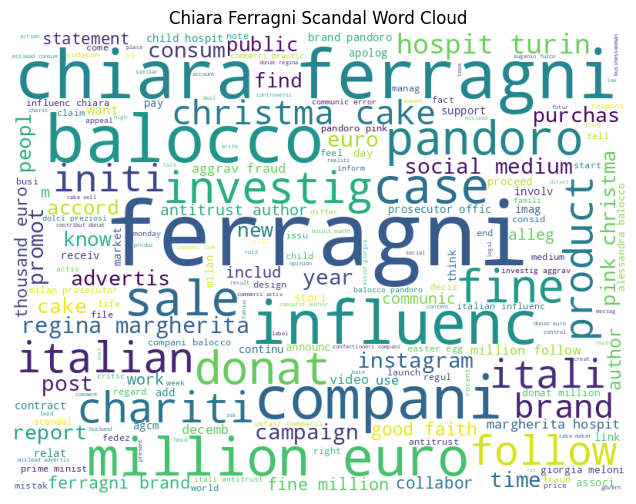

In [29]:
wordcloud(world_data) #print a word cloud for all the articles in the data frames combined

In [ ]:
#simple sentiment analysis
sentiment_dict, average_sentiment_dict = simple_sentiment(world_data)#run the sentiment analysis for all the articles' dataframes
EU_scraped_data.update(sentiment_dict)
print("Average Sentiment per Article:")
for url, sentiment in average_sentiment_dict.items():
  print(f"URL: {url}")
  print(f"Average Sentiment Polarity: {sentiment}")

In [108]:
frequent_sentiments(world_data) #retrieve the most frequent sentiments from the articles (chose model_type = "complex" as a parameter for the complex sentiment analysis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Most Frequent Sentiments:
- neutral: 1236 occurrences
- negative: 99 occurrences
- positive: 52 occurrences


In [89]:
# weaker topic modeling
topic_model(world_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.028*"ferragni" + 0.016*"price" + 0.016*"cake" + 0.016*"euro" + 0.015*"influenc" + 0.013*"pandoro" + 0.012*"promot" + 0.011*"charit" + 0.010*"believ" + 0.009*"chariti"')
(1, '0.046*"ferragni" + 0.033*"euro" + 0.030*"million" + 0.029*"hospit" + 0.027*"balocco" + 0.026*"donat" + 0.025*"pandoro" + 0.024*"fine" + 0.019*"compani" + 0.017*"cake"')
(2, '0.035*"ferragni" + 0.034*"investig" + 0.032*"balocco" + 0.028*"prosecutor" + 0.026*"fraud" + 0.025*"milan" + 0.021*"aggrav" + 0.015*"compani" + 0.013*"alessandra" + 0.013*"chiara"')
(3, '0.021*"ferragni" + 0.017*"fashion" + 0.015*"influenc" + 0.012*"like" + 0.012*"compani" + 0.011*"use" + 0.009*"brand" + 0.009*"group" + 0.008*"time" + 0.008*"product"')
(4, '0.018*"ferragni" + 0.014*"influenc" + 0.011*"mistak" + 0.011*"chiara" + 0.010*"chariti" + 0.010*"follow" + 0.009*"child" + 0.009*"italian" + 0.009*"medium" + 0.009*"social"')
(5, '0.020*"good" + 0.018*"ferragni" + 0.015*"influenc" + 0.014*"faith" + 0.012*"italian" + 0.011*"product" + 

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.233036  0.084862       1        1  27.737340
5     -0.045117  0.028707       2        1  11.154855
6     -0.080619 -0.074466       3        1  10.874624
2     -0.031927 -0.197354       4        1   9.758427
4      0.085042  0.019130       5        1   8.931364
0     -0.050674  0.082424       6        1   7.616831
7      0.037522  0.011334       7        1   6.896991
3      0.078363  0.011109       8        1   6.184750
9      0.152380  0.108906       9        1   5.496181
8      0.088067 -0.074651      10        1   5.348636, topic_info=           Term        Freq       Total Category  logprob  loglift
462        euro  197.000000  197.000000  Default  30.0000  30.0000
238    investig   98.000000   98.000000  Default  29.0000  29.0000
17       hospit  139.000000  139.000000  Default  28.0000  28.0000
56      balocco  222.000000  222.000000  Default  27.0000  27.0000
116       fraud   45.000000   45.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
117  prosecutor    4.651138   64.019677  Topic10  -5.2239   0.3063
817     increas    3.578031   11.095840  Topic10  -5.4862   1.7966
22      pandoro    4.583845  167.724496  Topic10  -5.2385  -0.6715
214      associ    3.910098   29.541189  Topic10  -5.3975   0.9061
211     chariti    4.197489   99.119663  Topic10  -5.3266  -0.2335

[636 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
454       6  0.790761    acceler
388       8  0.858898  accessori
261       1  0.127696     accord
261       3  0.287315     accord
261       5  0.063848     accord
...     ...       ...        ...
64       10  0.018877       year
440       2  0.133451      young
440       5  0.133451      young
440       6  0.133451      young
440      10  0.400352      young

[1407 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 7, 3, 5, 1, 8, 4, 10, 9])

In [65]:
#try the visualizations of the stronger topic modeling
world_tm, world_sentences = bert_cv(world_data) # fitted model with world articles

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning:

`alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.



In [66]:
# get_topic_info
# topic -1: disregard. contains outliers
world_tm.get_topic_info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Topic,Count,Name,Representation,Representative_Docs
0,-1,549,-1_ferragni_said_euros_hospital,"[ferragni, said, euros, hospital, million, pan...",[According to what we read in the\nappeal pres...
1,0,167,0_good_faith_mistake_make,"[good, faith, mistake, make, possible, teach, ...","[In a statement following the news, Ferragni s..."
2,1,72,1_milan_prosecutors_aggravated_fraud,"[milan, prosecutors, aggravated, fraud, alessa...",[The registration in the register of suspects ...
3,2,65,2_pandoro_hospital_turin_christmas,"[pandoro, hospital, turin, christmas, balocco,...",[The authority last month accused Ferragni’s c...
4,3,58,3_influencers_rules_marketing_media,"[influencers, rules, marketing, media, consume...",[In an aim to help improve transparency in soc...
5,4,57,4_chiara_2023_ferragni_shared,"[chiara, 2023, ferragni, shared, chiaraferragn...",[FILE - Chiara Ferragni poses for photographer...
6,5,57,5_420000_euros_fined_balocco,"[420000, euros, fined, balocco, fines, million...",[The authority issued fines of over one millio...
7,6,55,6_image_silence_broadcast_followers,"[image, silence, broadcast, followers, video, ...",[She thanked those who have been close to her ...
8,7,37,7_50000_donation_balocco_months,"[50000, donation, balocco, months, hospital, e...",[The competition watchdog claimed they had led...
9,8,37,8_fashion_blog_started_accessories,"[fashion, blog, started, accessories, blogger,...",[Ferragni started as a fashion blogger and wen...


In [67]:
# visualize_topics(): visualize the distance between topics, size of topics, words within topic
world_tm.visualize_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [68]:
# visualize_documents(sentence_list): visualize the topics and the sentences within each topic
world_tm.visualize_documents(world_sentences)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# visualize_barchart: visualize top 5 words in each topic and the c-tf-idf score
world_tm.visualize_barchart()

In [ ]:
# visualize_heatmap(): generates similarity matrix
world_tm.visualize_heatmap()

In [183]:
NER2(world_data) #get the important enitites

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top Entities
{'PERSON': ['Chiara Ferragni', 'Ms Ferragni', 'Ms Ferragni', 'Ms Ferragni', 'Ferragni', 'Giorgia Meloni', 'Ms Ferragni', "Chiara Ferragni's", 'Balocco', "Ms Ferragni's", 'Chiara Ferragni', 'Ms Ferragni', 'Ms Ferragni', 'Ms Ferragni', 'Giorgia Meloni', 'Ms Ferragni', 'Ferragni', 'Ferragni', 'Ferragni', 'Ferragni', 'Balocco', 'Ferragni', 'Alessandra Balocco', 'Ferragni', 'Ferragni', 'Balocco', 'Ferragni', 'Ferragni', 'Ferragni', 'Gianluca Perrelli', 'Perrelli', 'Ferragni', 'Cremona', 'Ferragni', 'Ferragni', 'Ferragni', 'Michele Costabile', 'Sandro Botticelli’s', 'Eike Schmidt', 'Ferragni', 'Ferragni', 'Giuseppe Conte', 'Ferragni', 'Chiara Ferragni', 'Ferragni', 'Ferragni', 'Tod', 'Ferragni', 'Balocco', 'Ferragni', 'Ferragni', 'Ferragni', 'Giorgia Meloni', 'Ferragni', 'Chiara Ferragni', 'Eugenio Fusco', 'Ferragni', 'Alessandra Balocco', 'Ferragni', 'Ferragni', 'Ferragni', 'Tod', 'Ferragni', 'Balocco', 'Ferragni', 'Chiara Ferragni', 'Adolfo Urso', 'Ferragni', 'Ferragni', 'Ferr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


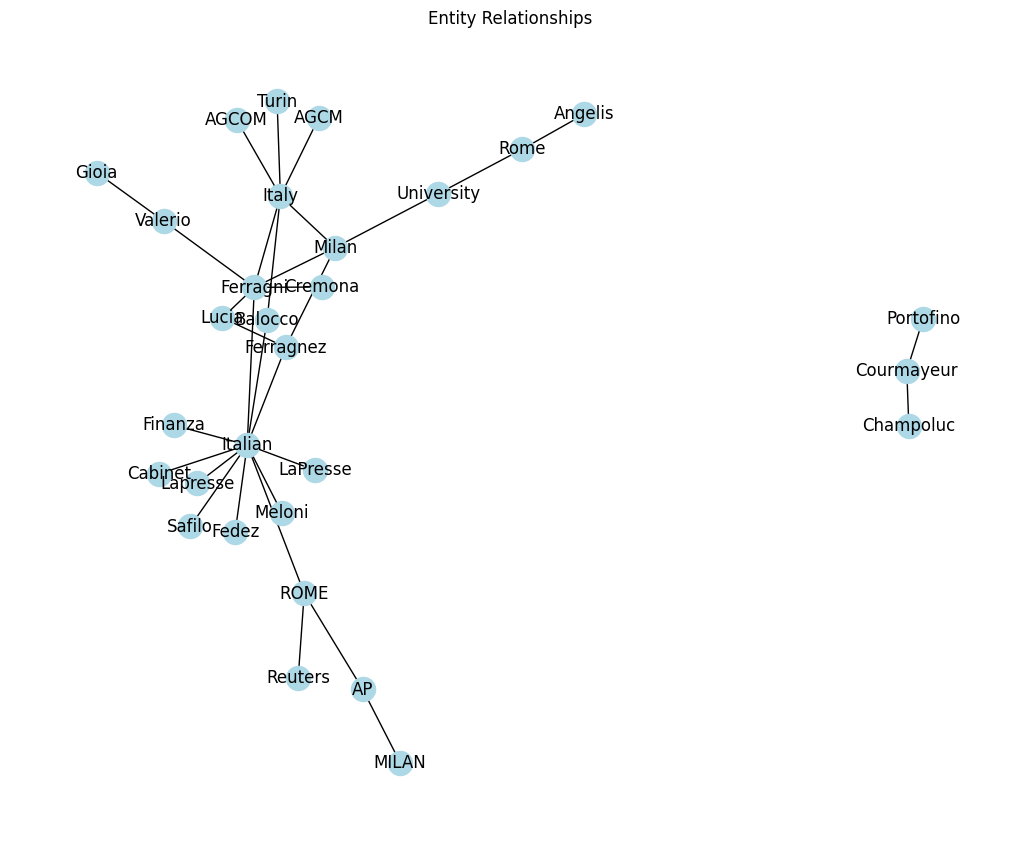

In [81]:
#relationship recognition
article_dict_with_relationships = relationships(world_data)

In [124]:
# Text summarization
summarize_article(world_data)

https://www.bbc.co.uk/news/world-europe-67759633
Italy's top influencer Chiara Ferragni has apologised for misleading consumers over purchases of a Christmas cake.
Appearing on the verge of tears, she said she would appeal against the AGCM antitrust authority's ruling and "disproportionate and unjust" fine.
The "Pandoro Pink Christmas", which was labelled as being designed by Ms Ferragni, was sold last year for more than €9, well over twice the price of the classic unbranded pandoro produced by the Balocco company.
The watchdog found last Friday that buyers of the Ferragni-branded pandoro cake
had been fooled into thinking that their purchases would contribute to the purchase of medical equipment for the hospital for the treatment of children with Osteosarcoma and Ewing's Sarcoma.
Ms Ferragni, 36, has promised to donate €1m to the Regina Margherita hospital.
https://www.telegraph.co.uk/world-news/2023/12/19/italy-influencer-chiara-ferragni-fined-christmas-cake-sale/
Ms Ferragni, 36, to

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-113-76b447b0b2c7>:17: RuntimeWarning: invalid value encountered in scalar divide
  similarity_score = np.dot(document_vector, sentence_vector) / (np.linalg.norm(document_vector) * np.linalg.norm(sentence_vector)) # Calculate cosine similarity score between the document vector and the current sentence vector


# Reddit Implementation

### Scrape Reddit

In [26]:
# reddit comments
reddit_posts = {'https://www.reddit.com/r/italy/comments/18ix1x6/antitrust_maxi_multa_a_chiara_ferragni_e_balocco/',
               'https://www.reddit.com/r/Italia/comments/149ttsb/i_pandori_balocco_di_chiara_ferragni_comprarli/',
               'https://www.reddit.com/r/italy/comments/18z3dll/e_pure_coca_cola_se_ne_va_meritato_o_stanno/',
               'https://www.reddit.com/r/Italia/comments/18ixpku/chiara_ferragni_1_milione_di_euro_di_multa/',
               'https://www.reddit.com/r/Italia/comments/18m0jsg/chiara_ferragni_dopo_il_pandoro_le_uova_di_pasqua/',
               'https://www.reddit.com/r/italy/comments/1927x0u/caso_balocco_alessandra_balocco_e_chiara_ferragni/?share_id=Yr3ZEMncRPmGK4imiMytR&utm_content=2&utm_medium=ios_app&utm_name=ioscss&utm_source=share&utm_term=1',
               'https://www.reddit.com/r/NYCinfluencersnark/comments/18t65wv/chiara_ferragni_misleading_charity_business/?share_id=6XppKHdF-xPW2IrrByzxh&utm_content=2&utm_medium=ios_app&utm_name=ioscss&utm_source=share&utm_term=1',
               'https://www.reddit.com/r/Fauxmoi/comments/18jm63f/top_influencer_chiara_ferragni_fined_12_mln_for/?share_id=xoB-ysIi1qW-7TRQmpvpc&utm_content=2&utm_medium=ios_app&utm_name=ioscss&utm_source=share&utm_term=1',
               'https://www.reddit.com/r/Italia/comments/18lwj4j/sfogo_su_chiara_ferragni/?share_id=-iUUfIfXPGb3V9iueXJTd&utm_content=2&utm_medium=ios_app&utm_name=ioscss&utm_source=share&utm_term=1',
               'https://www.reddit.com/r/Italia/comments/1903wzh/i_prodotti_invenduti_della_ferragni_svenduti/',
               'https://www.reddit.com/r/Italia/comments/19808ny/ferragni_nuovo_scandalo_in_arrivo_donazioni_in/',
               'https://www.reddit.com/r/Italia/comments/18m5up5/purtroppoferragni_le_uova_di_pasqua_come_il/',
               'https://www.reddit.com/r/Italia/comments/19eqb03/a_quanto_potrebbero_ammontare_i_danni_a_chiara/',
               'https://www.reddit.com/r/Italia/comments/18lix4m/chiara_fraudagni_e_il_pandoro_della_discordia/'}

reddit_scraped_data = {}

for url in reddit_posts:
    data = scrape_reddit(url)
    reddit_scraped_data[url] = data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environment

In [27]:
with open("reddit_bycomment_data.pickle", "wb") as outfile:
  pickle.dump(reddit_scraped_data, outfile)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Reddit NLP Application

In [28]:
#lLoading the dictionaries from the local file paths
with open("/content/drive/MyDrive/Colab Notebooks/Data Science in Action/Article Data/reddit_bycomment_data.pickle", "rb") as infile: #insert your own filepath
     reddit = pickle.load(infile)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# retreive the most frequent keywords
frequent_keywords(reddit)

Top Keywords:
Keyword: ferragni ; Count: 5
Keyword: balocco ; Count: 2
Keyword: donat ; Count: 2
Keyword: compani ; Count: 2
Keyword: fine ; Count: 2
Keyword: money ; Count: 2
Keyword: want ; Count: 1
Keyword: meloni ; Count: 1
Keyword: peopl ; Count: 1
Keyword: like ; Count: 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


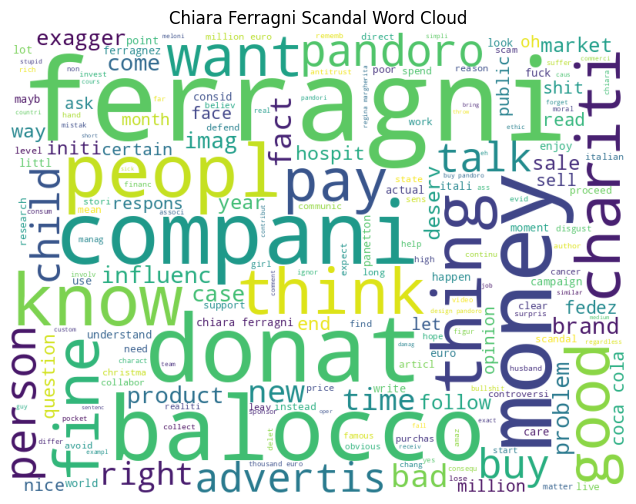

In [154]:
# word cloud
wordcloud(reddit)

In [30]:
# complex sentiment analysis
frequent_sentiments(reddit)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Most Frequent Sentiments:
- neutral: 849 occurrences
- annoyance: 26 occurrences
- admiration: 26 occurrences
- joy: 14 occurrences
- anger: 10 occurrences


In [163]:
# try simple topic modeling with world articles
topic_model(reddit)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.015*"like" + 0.013*"end" + 0.013*"fedez" + 0.012*"compani" + 0.011*"imag" + 0.010*"want" + 0.010*"question" + 0.010*"lose" + 0.007*"way" + 0.007*"money"')
(1, '0.021*"pandoro" + 0.016*"buy" + 0.014*"brand" + 0.014*"compani" + 0.014*"sell" + 0.013*"euro" + 0.011*"delet" + 0.011*"non" + 0.009*"money" + 0.009*"help"')
(2, '0.026*"thing" + 0.019*"enjoy" + 0.018*"think" + 0.016*"money" + 0.013*"year" + 0.013*"know" + 0.010*"ferragni" + 0.010*"talk" + 0.010*"spend" + 0.009*"donat"')
(3, '0.019*"fine" + 0.018*"donat" + 0.015*"time" + 0.015*"nice" + 0.012*"hospit" + 0.011*"million" + 0.010*"state" + 0.010*"buy" + 0.010*"oh" + 0.009*"good"')
(4, '0.015*"peopl" + 0.015*"point" + 0.013*"deserv" + 0.013*"like" + 0.009*"ferragni" + 0.009*"look" + 0.008*"good" + 0.008*"come" + 0.008*"job" + 0.007*"bad"')
(5, '0.022*"ferragni" + 0.016*"like" + 0.015*"compani" + 0.011*"think" + 0.010*"right" + 0.010*"problem" + 0.009*"actual" + 0.009*"littl" + 0.009*"live" + 0.009*"coca"')
(6, '0.028*"exagger" 

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.055798 -0.075048       1        1  15.480381
7     -0.087086  0.047505       2        1  11.803028
8     -0.060787 -0.022034       3        1  10.394238
1     -0.088803  0.118732       4        1  10.272708
5      0.019873 -0.112623       5        1  10.194670
3     -0.075748 -0.078617       6        1   9.523219
0      0.032630  0.075301       7        1   8.858902
2      0.084837  0.028532       8        1   8.729302
4      0.131119 -0.040235       9        1   8.265418
6      0.099762  0.058488      10        1   6.478135, topic_info=         Term       Freq      Total Category  logprob  loglift
1100  exagger  17.000000  17.000000  Default  30.0000  30.0000
116     enjoy  11.000000  11.000000  Default  29.0000  29.0000
137     donat  57.000000  57.000000  Default  28.0000  28.0000
71      thing  39.000000  39.000000  Default  27.0000  27.0000
91     chiara  19.000000  19.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
58     market   2.161066  17.016218  Topic10  -5.2229   0.6732
32    chariti   2.146226  31.146943  Topic10  -5.2298   0.0617
40       know   2.187736  43.848679  Topic10  -5.2106  -0.2611
349      hand   1.668158   7.552592  Topic10  -5.4817   1.2266
367      fine   1.670916  31.005127  Topic10  -5.4801  -0.1840

[702 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
199       1  0.825052  absolut
1021      7  0.865763   absurd
1062      8  0.755781   accord
1062     10  0.188945   accord
50        5  0.647053  account
...     ...       ...      ...
323       8  0.411642     year
323       9  0.117612     year
196       6  0.576008      yes
196       9  0.288004      yes
417       6  0.859169   youtub

[1352 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 9, 2, 6, 4, 1, 3, 5, 7])

In [ ]:
#try the visualizations of the stronger topic modeling
reddit_tm, reddit_sentences = bert_cv(reddit) # fitted model with EU articles

In [ ]:
# get_topic_info
# topic -1: disregard. contains outliers
reddit_tm.get_topic_info()

In [ ]:
# visualize_documents(sentence_list): visualize the topics and the sentences within each topic
reddit_tm.visualize_documents(reddit_sentences)

In [ ]:
# visualize_barchart: visualize top 5 words in each topic and the c-tf-idf score
reddit_tm.visualize_barchart()

In [ ]:
# visualize_heatmap(): generates similarity matrix
reddit_tm.visualize_heatmap()

In [158]:
# retreive the important enitites
NER2(reddit)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top Entities
Type PERSON
Entity: Ferragni ; Count: 101
Entity: Balocco ; Count: 36
Entity: Chiara Ferragni ; Count: 14
Entity: Fedez ; Count: 5
Entity: Madonna ; Count: 2
Type ORG
Entity: Coca Cola ; Count: 6
Entity: Ferragnez ; Count: 5
Entity: Antitrust ; Count: 3
Entity: Pandoro ; Count: 3
Entity: CAF ; Count: 3
Type GPE
Entity: Balocco ; Count: 13
Entity: Italy ; Count: 12
Entity: Turin ; Count: 7
Entity: Chiara ; Count: 5
Entity: Ewing ; Count: 3
Type LOC
Entity: Regina Margherita ; Count: 2
Entity: the Regina Margherita Hospital ; Count: 2
Entity: Africa ; Count: 1
Entity: Chef Rubio's ; Count: 1
Type PRODUCT
Entity: CocaCola ; Count: 2
Entity: 100k ; Count: 2
Entity: 700k ; Count: 1
Entity: Euros ; Count: 1
Entity: Codacons ; Count: 1
Type EVENT
Type FACILITY
Type LAW
